<a href="https://colab.research.google.com/github/ramonaferrarii/MachineLearning2/blob/main/FinalCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5 TALKING ROBOTS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from random import sample
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.svm import LinearSVC
from sklearn.svm import SVC


In [2]:
from google.colab import drive
drive.mount('/content/drive')

folder = 'drive/MyDrive/ML2_FinalProject/'
data = pd.read_excel(folder + 'dataset.xlsx')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
print("Dataset format: ",data.shape)

Dataset format:  (500000, 11)


In [4]:
data.head(5)

,source,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10
0,0,2,5,2,5,6,2,1,8,1,3
1,1,1747,1749,1751,1758,1765,1767,1772,1774,1783,1785
2,2,65056,195168,1561344,7806720,31226880,187361280,749445120,6745006080,6745006080,6745006080
3,3,2855,2860,2865,2870,2875,2880,2885,2890,2895,2900
4,4,11440,57200,286000,1430000,7150000,35750000,178750000,893750000,4468750000,22343750000


In [5]:
data.isnull().sum()

,0
source,0
num1,0
num2,0
num3,0
num4,0
num5,0
num6,0
num7,0
num8,0
num9,0


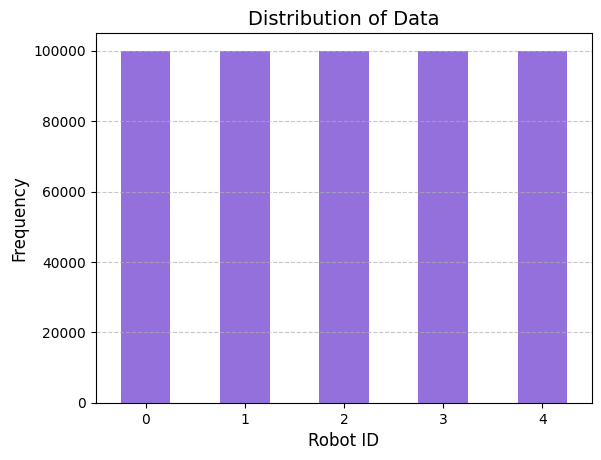

In [20]:
data['source'].value_counts().plot(kind='bar', color='mediumpurple')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Robot ID',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.title('Distribution of Data', fontsize=14)
plt.show()


In [7]:
taken_data = 5000                             # PARAMETER to change quantity of considered data
X = data.iloc[0:taken_data,1:11].values
Y = data.iloc[0:taken_data,0].values

print('Shape of X: ' + str(X.shape))
print('Shape of Y: ' + str(Y.shape))
print('MIN Vales of Y: ' + str(min(Y)))
print('MAX Vales of Y: ' + str(max(Y)))

Shape of X: (5000, 10)
Shape of Y: (5000,)
MIN Vales of Y: 0
MAX Vales of Y: 4


In [8]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [9]:
n  = round(0.70 * taken_data)
nt = round(0.30 * taken_data)
mask = np.asarray(sample(range(0,X.shape[0]),n+nt))
X = X[mask,:]
Y = Y[mask]

mask = range(0,n)
XL = X[mask,:]
YL = Y[mask]
mask = range(n,n+nt)
XT = X[mask,:]
YT = Y[mask]

### Utility Fuctions

In [10]:
def plt_confmatrix(ytest,ypred):
  conf_matrix=confusion_matrix(YT, Yp)
  disp =  ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=M.classes_)
  disp.plot(cmap='Purples')
  plt.title('Confusion Matrix')
  plt.show()

def print_err(YT, Yp):
    err = round(100 * np.mean(YT != Yp))
    print(f'Err: {err:}%')

def print_acc(YT, Yp):
    acc = round(100 * np.mean(YT == Yp))
    print(f'Accuracy: {acc:}%')
    return acc

def print_best_params(M):
    print(f'Best parameters: {M.best_params_}')

## KNN CLASSIFIER

In [11]:
grid = {'n_neighbors': [1,2,4,8,16,32]}
M = GridSearchCV(estimator  = KNeighborsClassifier(),
                 param_grid = grid,
                 cv         = 10,
                 scoring    = 'accuracy')
M.fit(np.asarray(XL),np.asarray(YL))
Yp = M.predict(XT)

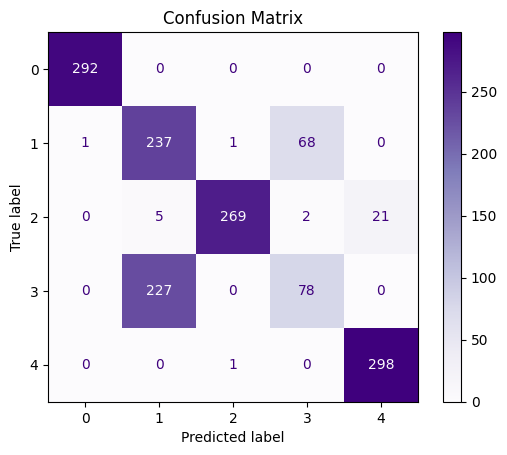

Accuracy: 78%
Best parameters: {'n_neighbors': 2}


In [12]:
plt_confmatrix(YT,Yp)
#print_err(YT,Yp)
acc_knn = print_acc(YT,Yp)
print_best_params(M)

## LINEAR SVC

In [13]:
grid = {'C':       np.logspace(-4,3,10),
        'penalty': ['l1','l2']}
M = GridSearchCV(estimator  = LinearSVC(),
                 param_grid = grid,
                 cv         = 10,
                 scoring    = 'accuracy')
M.fit(np.asarray(XL),np.asarray(YL))
Yp = M.predict(XT)

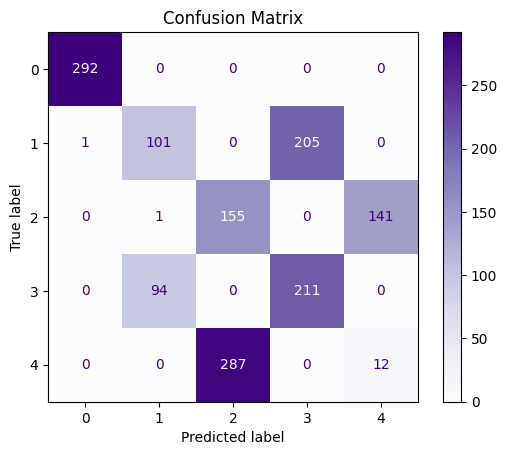

Accuracy: 51%
Best parameters: {'C': 1000.0, 'penalty': 'l1'}


In [14]:
plt_confmatrix(YT,Yp)
#print_err(YT,Yp)
acc_linsvc = print_acc(YT,Yp)
print_best_params(M)

## SVC WITH LINEAR

In [15]:
grid = {'C':      np.logspace(-4,3,10),
        'kernel': ['linear']}
M = GridSearchCV(estimator  = SVC(),
                 param_grid = grid,
                 cv         = 10,
                 scoring    = 'accuracy')
M.fit(np.asarray(XL),np.asarray(YL))
Yp = M.predict(XT)

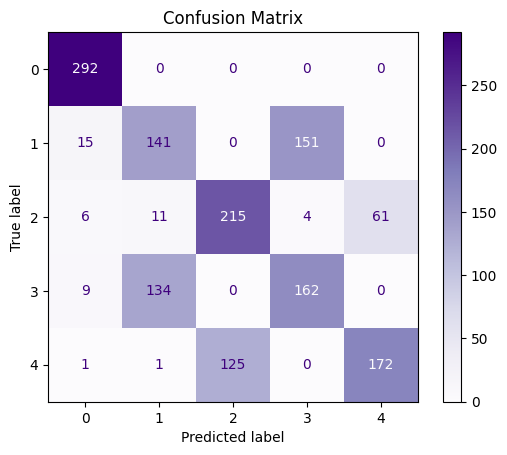

Accuracy: 65%
Best parameters: {'C': 1000.0, 'kernel': 'linear'}


In [16]:
plt_confmatrix(YT,Yp)
#print_err(YT,Yp)
acc_svc_linkern= print_acc(YT,Yp)
print_best_params(M)

## SVC WITH KERNEL RBF

In [17]:
grid = {'C':      np.logspace(-4,3,10),
        'kernel': ['rbf'],
        'gamma':  np.logspace(-4,3,10)}
M = GridSearchCV(estimator  = SVC(),
                 param_grid = grid,
                 cv         = 10,
                 scoring    = 'accuracy')
M.fit(np.asarray(XL),np.asarray(YL))
Yp = M.predict(XT)


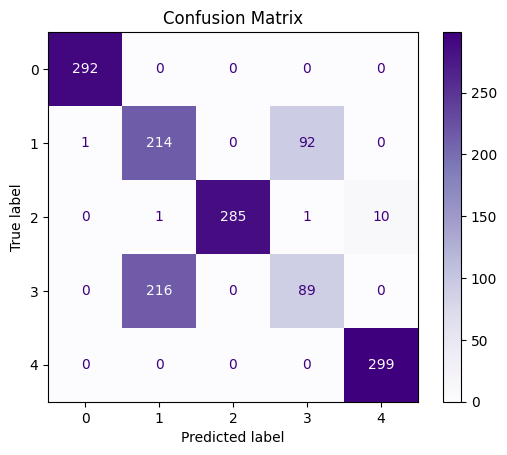

Accuracy: 79%
Best parameters: {'C': 1000.0, 'gamma': 1000.0, 'kernel': 'rbf'}


In [18]:
plt_confmatrix(YT,Yp)
#print_err(YT,Yp)
acc_svc_rbfkern= print_acc(YT,Yp)
print_best_params(M)

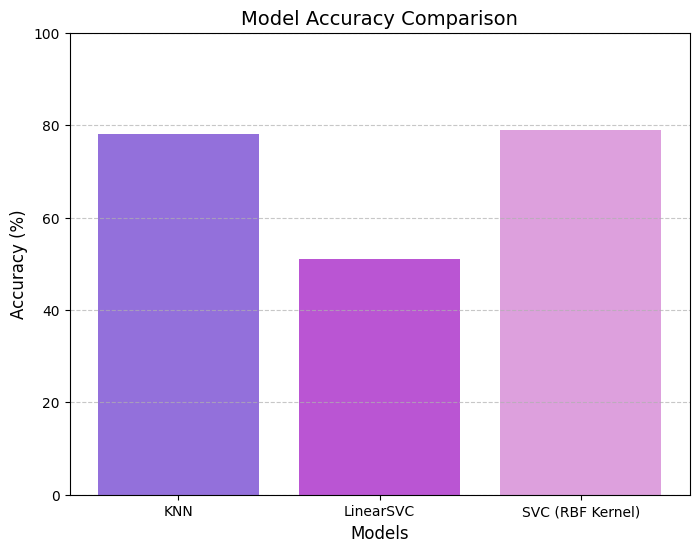

In [19]:
models = ['KNN', 'LinearSVC', 'SVC (RBF Kernel)']
values = [acc_knn, acc_linsvc, acc_svc_rbfkern]

plt.figure(figsize=(8, 6))
plt.bar(models, values, color=['mediumpurple','mediumorchid', 'plum'])
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Models', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()